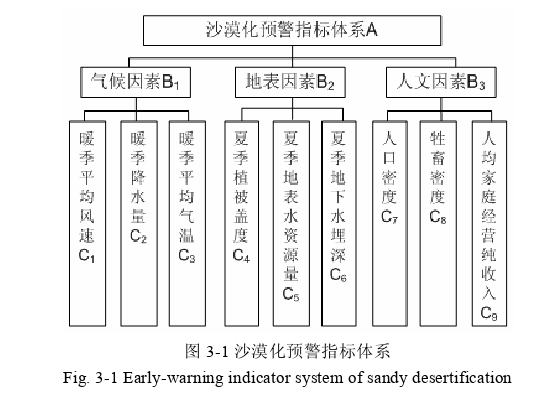

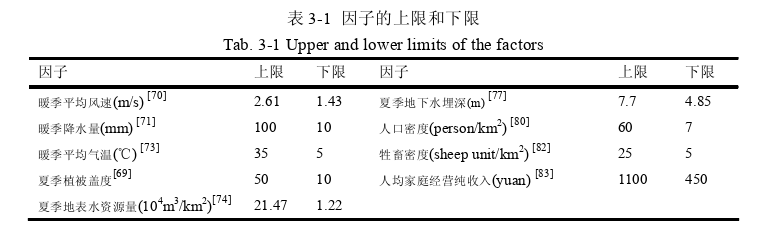

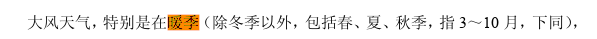

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path as P
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']  # 汉字字体,优先使用楷体，如果找不到楷体，则使用黑体
plt.rcParams['font.size'] = 12  # 字体大小
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
from collections import defaultdict
import plotly.express as px

In [63]:
# 附件8 气候因素
WIND='暖季平均风速(m/s)'
RAIN='暖季降水量(mm)'
TEMP='暖季平均气温(℃)'

# 地表因素
PLANT='夏季植被盖度'
WATER='夏季地表水资源量(104m3/km2)'
UNDER_WATER='夏季地下水埋深(m)'

# 人文因素
PERSON='人口密度(person/km2)'
SHEEP='牲畜密度(sheep unit/km2)'
MONEY='人均家庭经营纯收入(yuan)'


## 气候因素

In [64]:
df=pd.read_csv('附件8-气候-预处理.csv',index_col='time',parse_dates=True)


In [65]:
df.columns

Index(['year', 'month', '平均气温(℃)', '平均最高气温(℃)', '平均最低气温(℃)', '最高气温极值(℃)',
       '最低气温极值(℃)', '平均气温≥18℃的天数', '平均气温≤0℃的天数', '平均露点温度(℃)', '降水量(mm)',
       '最大单日降水量(mm)', '降水天数', '平均海平面气压(hPa)', '最低海平面气压(hPa)', '平均站点气压(hPa)',
       '平均能见度(km)', '最小能见度(km)', '最大能见度(km)', '平均风速(knots)', '平均最大持续风速(knots)',
       '单日最大平均风速(knots)'],
      dtype='object')

In [66]:
COLS=['平均气温(℃)','降水量(mm)', '平均风速(knots)','month','year']
df=df[COLS]


In [67]:
WARM_SEASON=list(range(3,11))
WARM_SEASON

[3, 4, 5, 6, 7, 8, 9, 10]

In [68]:
df=df[df.month.isin(WARM_SEASON)]
df

,平均气温(℃),降水量(mm),平均风速(knots),month,year
time,,,,,
2012-03-01,-7.11,21.84,7.36,3,2012
2012-04-01,6.94,6.10,8.82,4,2012
2012-05-01,14.61,50.80,8.56,5,2012
2012-06-01,17.69,98.81,6.86,6,2012
2012-07-01,21.14,183.39,6.91,7,2012
...,...,...,...,...,...
2022-03-01,-2.36,115.57,6.37,3,2022
2022-04-01,7.61,3.30,7.41,4,2022
2022-05-01,12.95,13.21,6.55,5,2022


In [69]:
df=df.resample('1Y').mean().drop(columns='month')
df['year']=df['year'].astype(int)
df

,平均气温(℃),降水量(mm),平均风速(knots),year
time,,,,
2012-12-31,11.29750,62.80250,7.15000,2012
2013-12-31,11.56000,35.97375,7.23875,2013
2014-12-31,12.59875,35.75000,6.60250,2014
2015-12-31,11.80125,51.75250,6.72125,2015
2016-12-31,12.47125,48.41875,6.75250,2016
2017-12-31,13.14875,22.22375,6.64625,2017
2018-12-31,13.27125,40.29250,6.84875,2018
2019-12-31,12.82750,40.16375,6.61375,2019
2020-12-31,12.09750,47.08500,6.64750,2020


In [70]:
df.to_csv('问题4-气候因素-预处理.csv')

## 人文因素

In [71]:
f=list(P.cwd().rglob('内蒙古自治区锡林郭勒盟不同示范牧户牲畜数量调查数据集（2018年7月28日-2020年9月30日）.xlsx'))[0]
f

WindowsPath('D:/我的数据/研二上学期/华为杯/2022E/数据集/监测点数据/附件13：内蒙古自治区锡林郭勒盟不同示范牧户牲畜数量调查数据集（2018年7月-2020年9月）/内蒙古自治区锡林郭勒盟不同示范牧户牲畜数量调查数据集（2018年7月28日-2020年9月30日）.xlsx')

In [72]:
# 人文因素
PERSON='人口密度(person/km2)'
SHEEP='牲畜密度(sheep unit/km2)'
MONEY='人均家庭经营纯收入(yuan)'
YEAR='year'

In [73]:
df=pd.read_excel(f, sheet_name='汇总')
df.columns

Index(['年份', '人口数', '经济年净收入', '人均年净收入', '监测点', '标准羊单位（只）', '草场面积 km²',
       '放牧压力（只羊/km²）'],
      dtype='object')

In [74]:
YEAR,NUM_PERSON,NET_INCOME,AVE_INCOME,PLOT,NUM_SHEEP,AREA,SHEEP_DENSE=\
['年份', '人口数', '经济年净收入', '人均年净收入', '监测点', '标准羊单位（只）', '草场面积 km²', '放牧压力（只羊/km²）']

In [75]:
df[AREA]=df[NUM_SHEEP]/df[SHEEP_DENSE]
df[PERSON]=df[NUM_PERSON]/df[AREA]
NUM_WEEK=52
df[SHEEP]=df[SHEEP_DENSE]/NUM_WEEK
df[MONEY]=df[AVE_INCOME]*100
df['year']=df['年份'].apply(lambda x:int(x.replace('年', '')))

In [85]:
HUMAN_COLS=[PERSON,SHEEP,MONEY,'year']
df=df[HUMAN_COLS]
df.to_csv('问题4-人文因素-预处理.csv',index=False)

## 地表因素

In [ ]:
# 地表因素
PLANT='夏季植被盖度'
WATER='夏季地表水资源量(104m3/km2)'
UNDER_WATER='夏季地下水埋深(m)'